In [1]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer
# Regression Analysis for House Prices

## Import the Libraries and Data

In [2]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [4]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv(r"C:\Users\hindo\Downloads\Maison (1).csv")

In [5]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [6]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [7]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [9]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


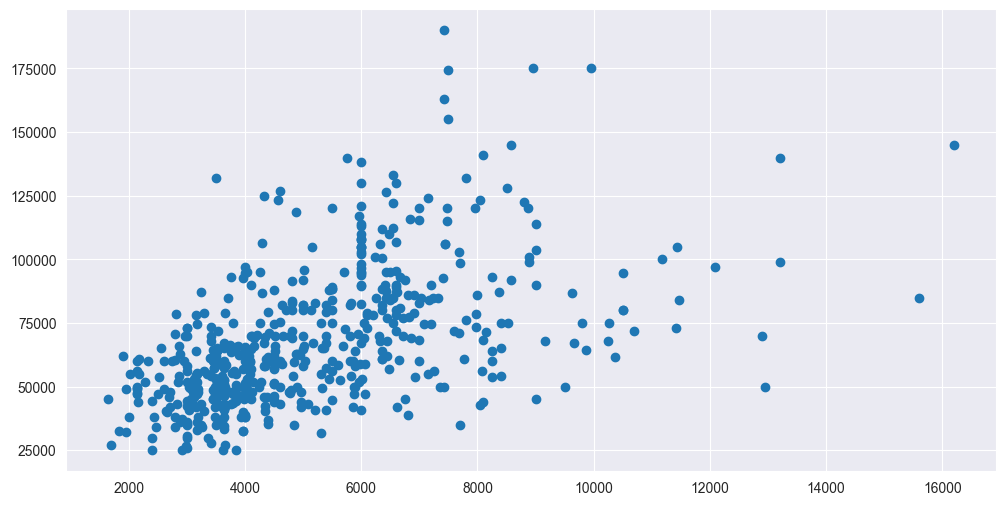

In [10]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()

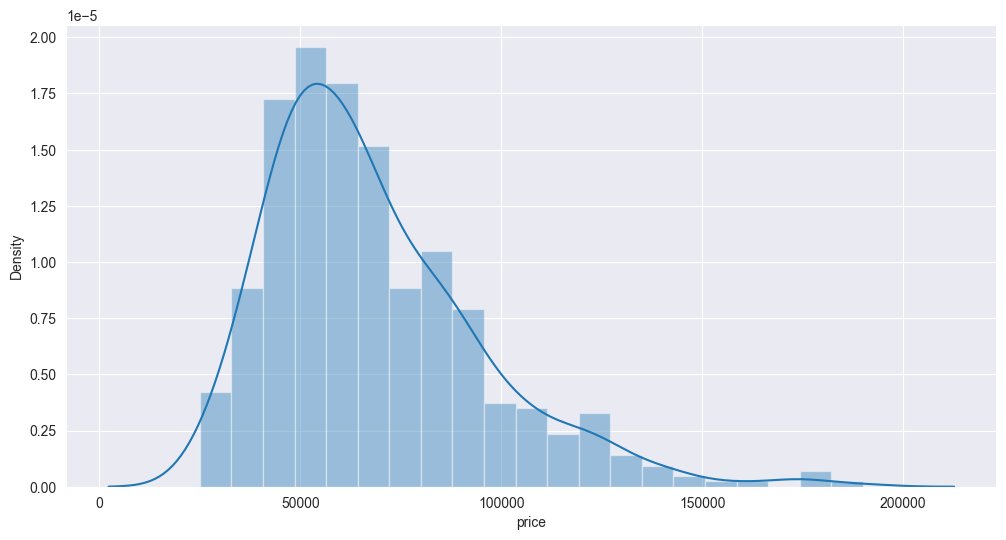

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()

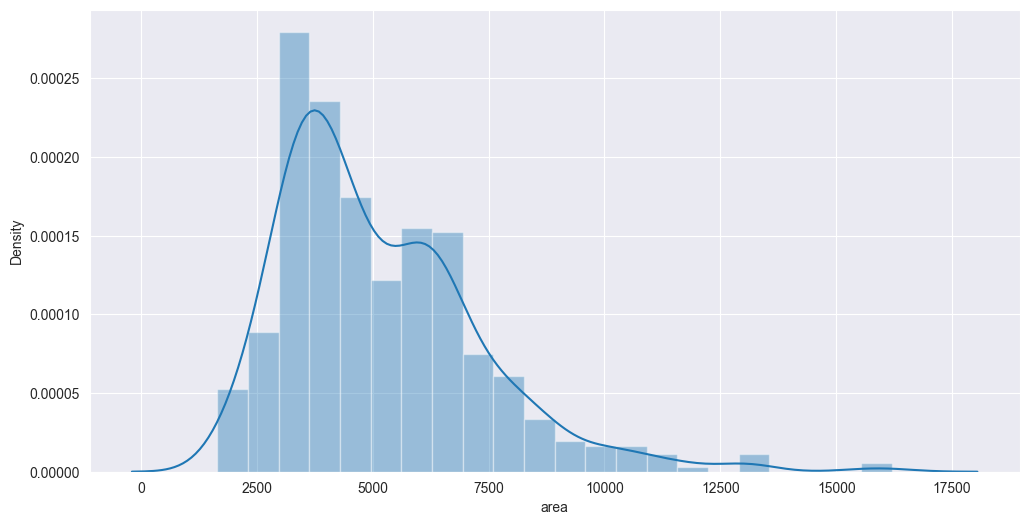

In [12]:
sns.distplot(house['area'])
plt.show()

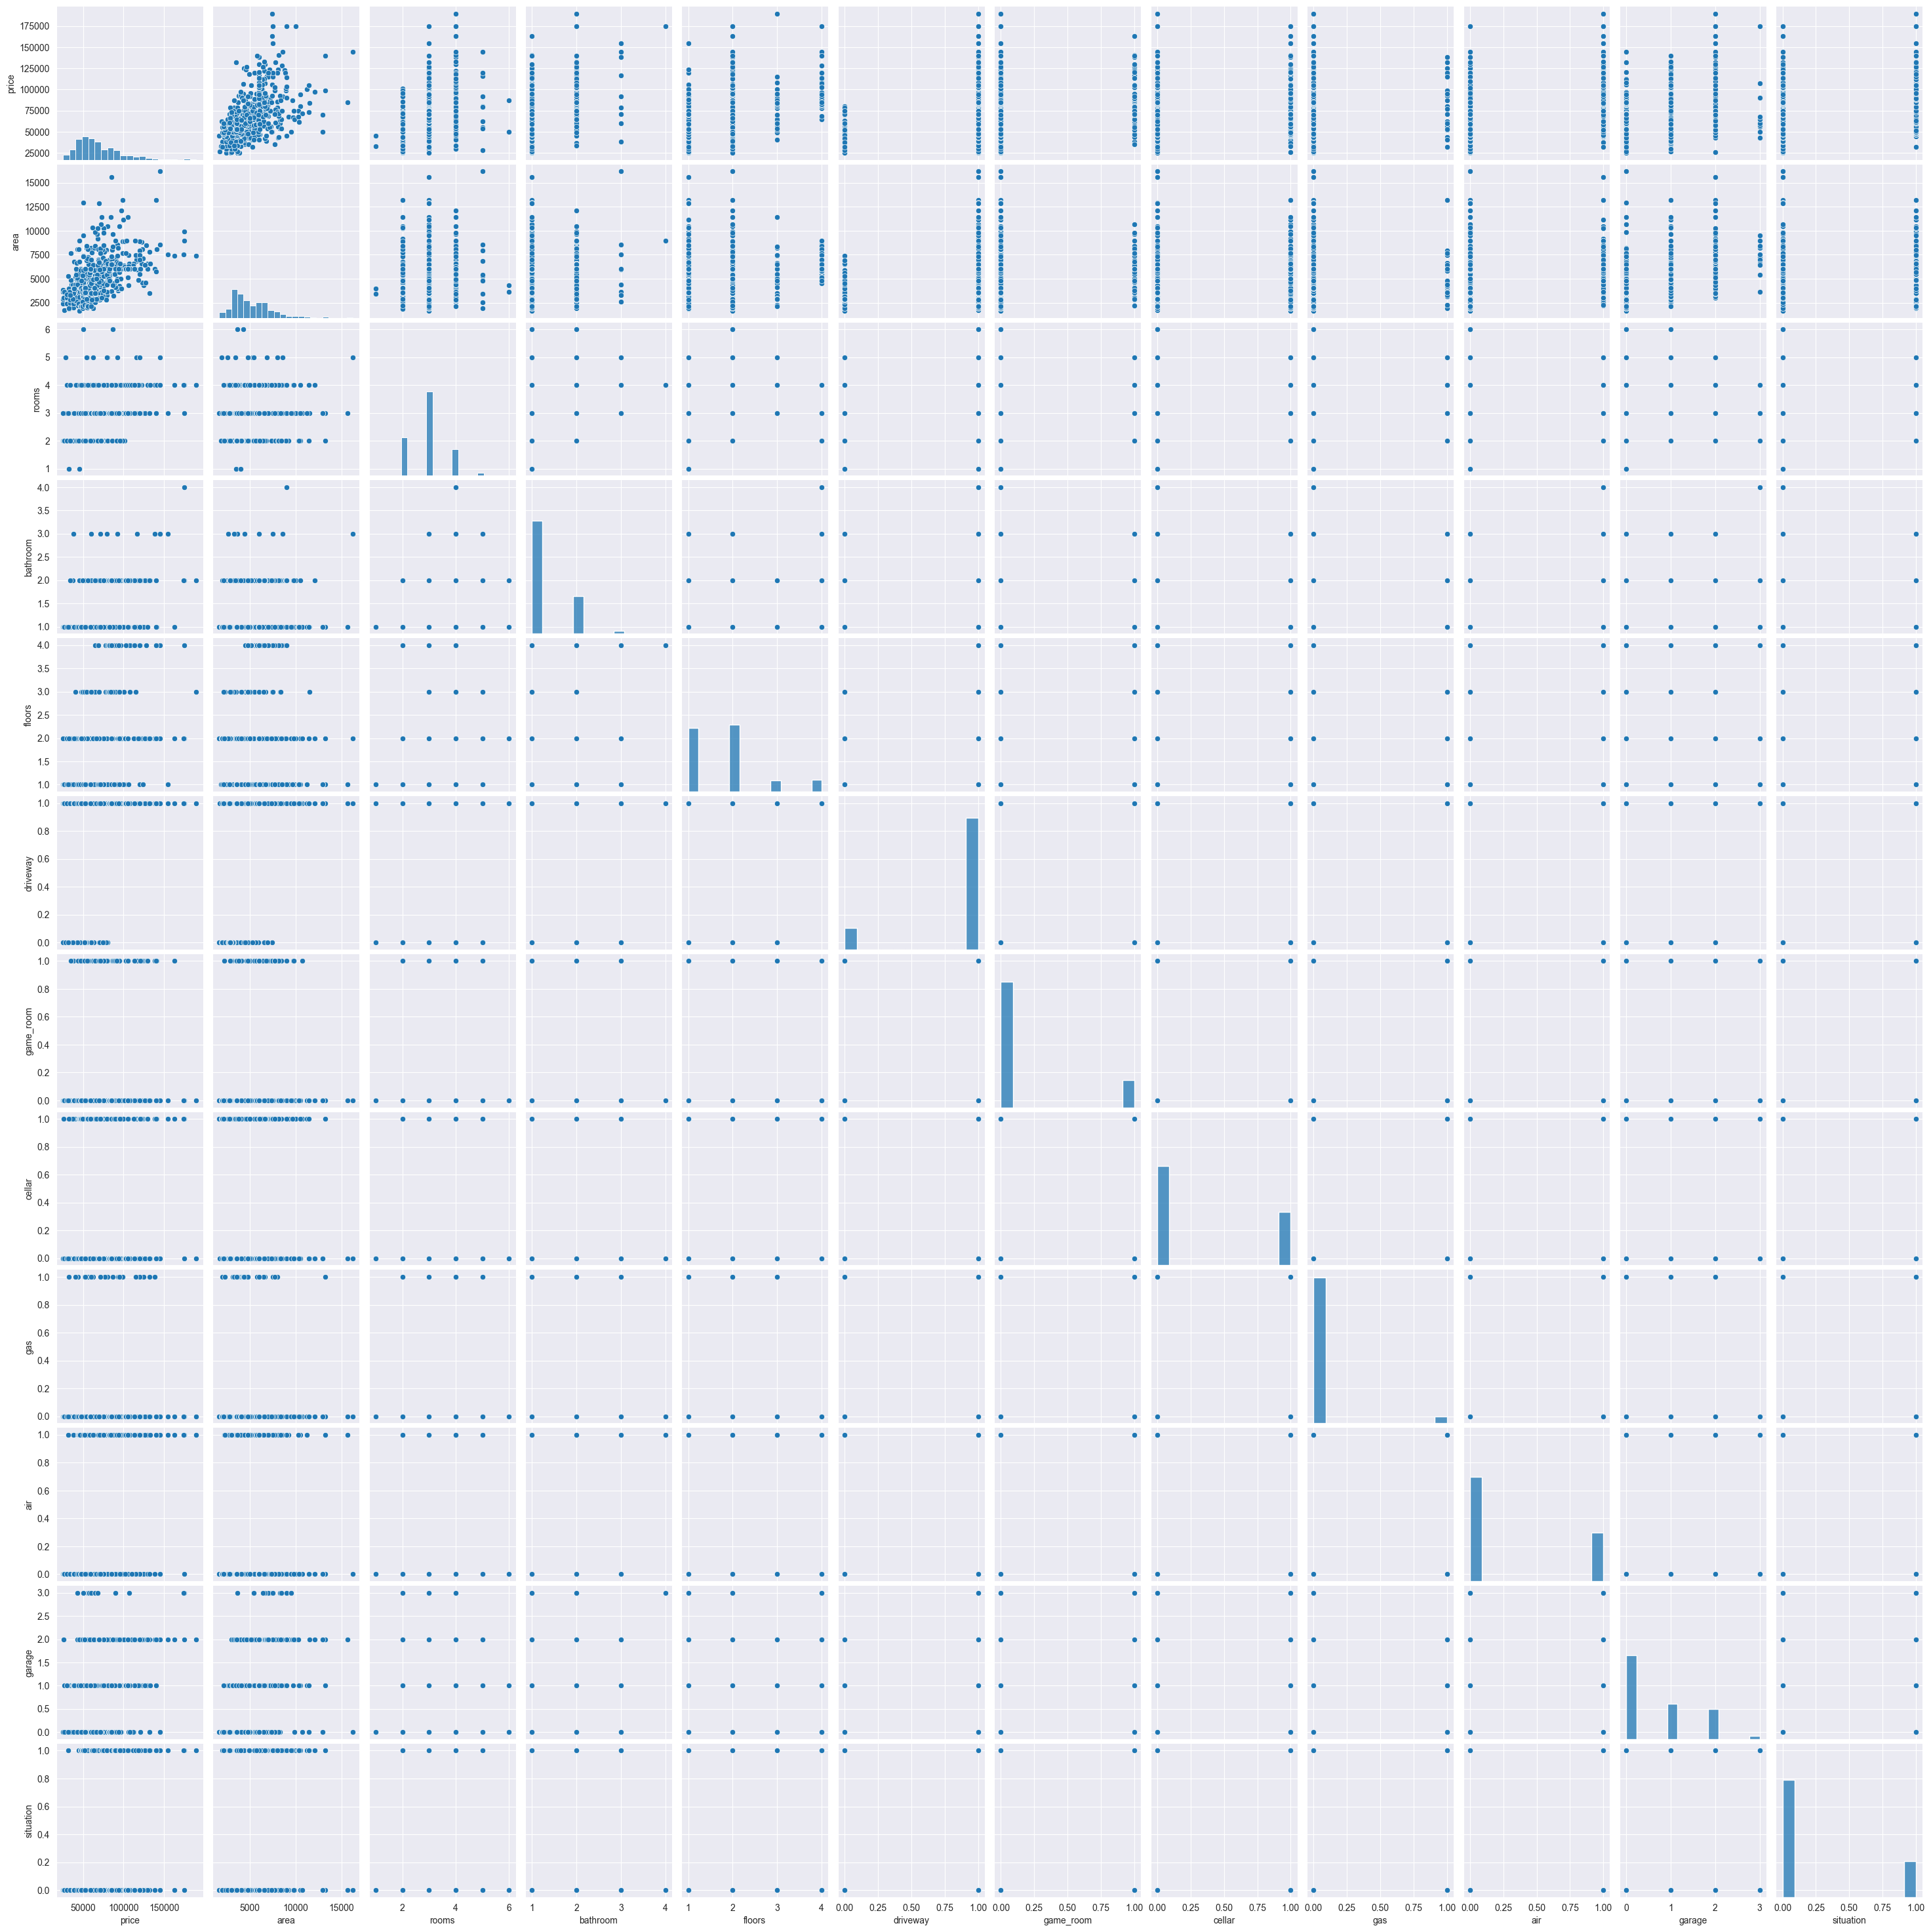

In [13]:
sns.pairplot(house)

<Axes: >

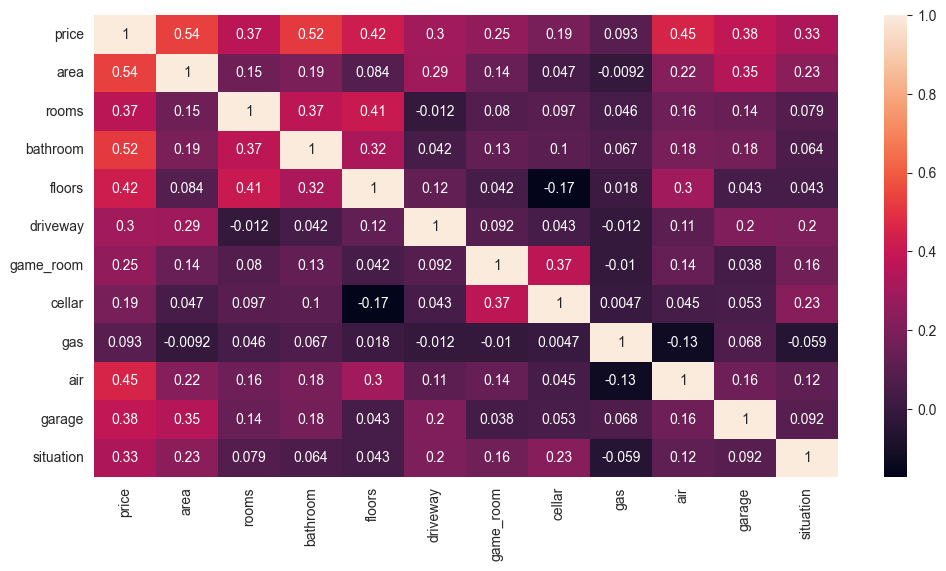

In [14]:
sns.heatmap(house.corr(), annot=True)

## Regression using the standard sklearn library

In [15]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [17]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
#Intercept for the regression line
print(lm.intercept_)

-1824.2489388806716


In [21]:
# Now let's look at the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
# it would be nicer if we can put them together in a dataframe

,Coefficient
area,3.593333
rooms,1852.478941
bathroom,14553.595131
floors,6030.093189
driveway,4511.501095
game_room,4871.762316
cellar,3676.206733
gas,16180.394524
air,13994.412874
garage,4288.271279


In [22]:
predictions = lm.predict(X_test)

In [23]:
#Residual sum of square values in various formats
#RMSE is the most suitable one
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10863.63980862178
MSE: 206903231.43659282
RMSE: 14384.13123676897


In [24]:
predictions

array([ 76920.78777417,  37520.41822308,  56052.47313997,  80080.49768003,
        64258.6405538 ,  98552.76632825,  52013.19803666,  76298.37015688,
        63309.08905642,  47504.27005229,  43337.76847418,  54624.34468679,
        69172.56375547,  66821.51059245,  78741.18257343,  69415.40707637,
        78482.24078304,  55077.41192509,  72234.25661539,  53466.88823523,
        84247.85407495,  85744.28845383,  43266.82973707,  72827.87547636,
        43768.96843267,  39911.89711175,  62948.44686878,  53520.07371614,
       112783.10363513,  39983.7637715 ,  49744.90827809,  96307.99619727,
        41349.23030673,  62473.90233356,  70523.69664447,  85920.12328867,
        50336.86811588,  41558.16831305, 113134.77233782,  82014.52978315,
        61279.16359401,  49829.49615714,  50993.78030164,  52464.83426232,
        52975.57497317,  79196.76485239,  88720.27427479,  79530.81918719,
        44424.3261291 ,  46997.20648079,  70420.83428513,  47471.06927287,
        39823.97623907, 1

## Regression Model using the Statsmodel Library

In [25]:
import statsmodels.api as sm

In [26]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

In [27]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [28]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     79.91
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.37e-96
Time:                        20:15:33   Log-Likelihood:                -4826.5
No. Observations:                 436   AIC:                             9677.
Df Residuals:                     424   BIC:                             9726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1824.2489   4017.285     -0.454      0.650   -9720.522    6072.025
area           3.5933      0.408      8.806      0.000       2.791       4.395
rooms       1852.4789   1224.445      1.513      0.131    -554.259    4259.217
bathroom    1.455e+04   1667.825      8.726      0.000    1.13e+04    1.78e+04
floors      6030.0932   1030.350      5.852      0.000    4004.864    8055.323
driveway    4511.5011   2439.516      1.849      0.065    -283.549    9306.552
game_room   4871.7623   2141.280      2.275      0.023     662.917    9080.607
cellar      3676.2067   1828.771      2.010      0.045      81.620    7270.794
gas         1.618e+04   3681.949      4.395      0.000    8943.248    2.34e+04
air         1.399e+04   1775.248      7.883      0.000    1.05e+04    1.75e+04
garage      4288.2713    946.541      4.530      0.000    2427.774    6148.768
situation   1.006e+04   1897.666      5.303      0.000    6333.908    1.38e+04
==============================================================================
Omnibus:                       75.607   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.844
Skew:                           0.844   Prob(JB):                     4.02e-44
Kurtosis:                       5.855   Cond. No.                     3.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
#from sklearn import metrics

#print('MAE :', metrics.mean_absolute_error(y_test, predictions))
#print('MSE :', metrics.mean_squared_error(y_test, predictions))
#print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

In [30]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [31]:
predictions

225    76920.787774
18     37520.418223
48     56052.473140
355    80080.497680
350    64258.640554
           ...     
170    43695.903835
147    92080.823054
65     68616.214792
56     32940.875373
430    55718.436317
Length: 110, dtype: float64